In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC as sk_SVC
from sklearn.metrics import accuracy_score as sk_accuracy_score
from sklearn.model_selection import train_test_split as sk_train_test_split

from dklearn.svm import SVC as dk_SVC
from dklearn.metrics import accuracy_score as dk_accuracy_score
from dklearn.model_selection import train_test_split as dk_train_test_split

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)

In [3]:
def plot_svm_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# SVM from Scikit-Learn

In [4]:
sk_X_train, sk_X_test, sk_y_train, sk_y_test = sk_train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
sk_X_train = scaler.fit_transform(sk_X_train)
sk_X_test = scaler.transform(sk_X_test)

In [6]:
sk_clf = sk_SVC(kernel='linear', C=1.0)
sk_clf.fit(sk_X_train, sk_y_train)

sk_y_pred = sk_clf.predict(sk_X_test)
print("Accuracy:", sk_accuracy_score(sk_y_test, sk_y_pred))

Accuracy: 1.0


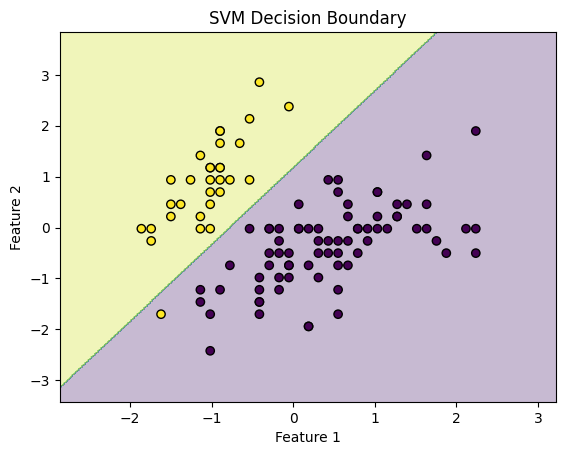

In [7]:
plot_svm_boundary(sk_X_train, sk_y_train, sk_clf)

# SVM from Scratch

In [8]:
dk_X_train, dk_X_test, dk_y_train, dk_y_test = dk_train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
scaler = StandardScaler()
dk_X_train = scaler.fit_transform(dk_X_train)
dk_X_test = scaler.transform(dk_X_test)

In [10]:
dk_clf = dk_SVC(num_features=dk_X_train.shape[1], C=1.0)
dk_clf.fit(dk_X_train, dk_y_train)

dk_y_pred = dk_clf.predict(dk_X_test)
print("Accuracy:", dk_accuracy_score(dk_y_test, dk_y_pred))

Accuracy: 0.9777777777777777


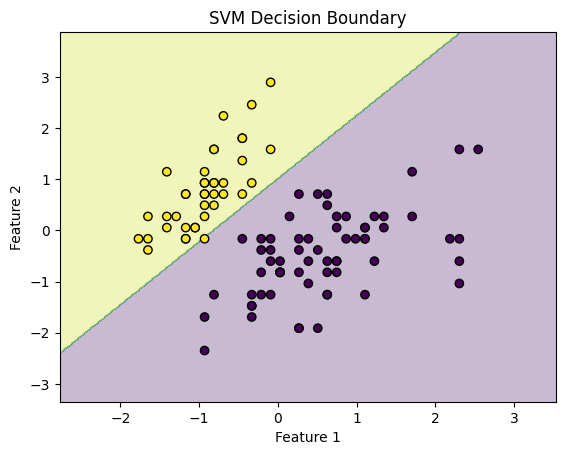

In [11]:
plot_svm_boundary(dk_X_train, dk_y_train, dk_clf)